# To Eat or Not to Eat
### Predicting whether a mushroom is edible or toxic  

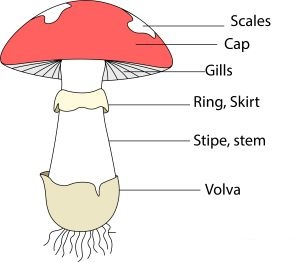

### Importing Libraries

In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


##  Exploring the Data (EDA)

In [227]:
#import data into DataFrame
# there are 22 features and 8124 different samples.
dataset = pd.read_csv("mushrooms.csv")
dataset.head(5) 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [228]:
#convert columns features to full name of for a better understanding of data. 

classes = {'p': 'toxic', 'e': 'edible'}
cap_shape = {'x': 'convex', 'b': 'bell', 's': 'sunken', 'f': 'flat', 'k': 'knobbed', 'c': 'conical'}
cap_surface = {'s': 'smooth', 'y': 'scaly', 'f': 'fibrous', 'g': 'grooves'}
cap_color = {'n': 'brown', 'y': 'yellow', 'w': 'white', 'g': 'gray', 'e': 'red', 'p': 'pink', 'b': 'buff', 'u': 'purple', 'c': 'cinnamon', 'r': 'green'}
bruises = {'t': 'yes', 'f': 'no'}
odor = {'p': 'pungent', 'a': 'almond', 'l': 'anise', 'n': 'none', 'f': 'foul', 'c': 'creosote', 'y': 'fishy', 's': 'spicy', 'm': 'musty'}
gill_attachment = {'f': 'free', 'a': 'attached', 'd': 'descending', 'n': 'notched'}
gill_spacing = {'c': 'close', 'w': 'crowded', 'd': 'distant'}
gill_size = {'n': 'narrow', 'b': 'broad'}
gill_color = {'k': 'black', 'n': 'brown', 'g': 'gray', 'p': 'pink', 'w': 'white', 'h': 'chocolate', 'u': 'purple', 'e': 'red', 'b': 'buff', 'r': 'green', 'y': 'yellow', 'o': 'orange'}
stalk_shape = {'e': 'enlarging', 't': 'tapering'}
stalk_root = {'e': 'equal', 'c': 'club', 'b': 'bulbous', 'r': 'rooted', '?': 'missing', 'e': 'equal', 'z': 'rhhizomorphs'}
stalk_surface_above_ring = {'s': 'smooth', 'f': 'fibrous', 'k': 'silky', 'y': 'scaly'}
stalk_surface_below_ring = {'s': 'smooth', 'f': 'fibrous', 'y': 'scaly', 'k': 'silky'}
stalk_color_above_ring = {'w': 'white', 'g': 'gray', 'p': 'pink', 'n': 'brown', 'b': 'buff', 'e': 'red', 'o': 'orange', 'c': 'cinnamon', 'y': 'yellow'}
stalk_color_below_ring = {'w': 'white', 'p': 'pink', 'g': 'gray', 'b': 'buff', 'n': 'brown', 'e': 'red', 'y': 'yellow', 'o': 'orange', 'c': 'cinnamon'}
veil_type = {'p': 'partial', 'u': 'universal'}
veil_color = {'w': 'white', 'n': 'brown', 'o': 'orange', 'y': 'yellow'}
ring_number = {'o': 'one', 't': 'two', 'n': 'none'}
ring_type = {'p': 'pendant', 'e': 'evanescent', 'l': 'large', 'f': 'flaring', 'n': 'none', 'c': 'cobwebby', 's': 'sheathing', 'z': 'zone'}
spore_print_color = {'k': 'black', 'n': 'brown', 'u': 'purple', 'h': 'chocolate', 'w': 'white', 'r': 'green', 'o': 'orange', 'y': 'yellow', 'b': 'buff'}
population = {'s': 'scattered', 'n': 'numerous', 'a': 'abundant', 'v': 'several', 'y': 'solitary', 'c': 'clustered'}
habitat = {'u': 'urban', 'g': 'grasses', 'm': 'meadows', 'd': 'woods', 'p': 'paths', 'w': 'waste', 'l': 'leaves'}

# new dataset
name= dataset.copy()
name['class'] = name['class'].replace(classes)
name['cap-shape'] = name['cap-shape'].replace(cap_shape)
name['cap-surface'] = name['cap-surface'].replace(cap_surface)
name['cap-color'] = name['cap-color'].replace(cap_color)
name['bruises'] = name['bruises'].replace(bruises)
name['odor'] = name['odor'].replace(odor)
name['gill-attachment'] = name['gill-attachment'].replace(gill_attachment)
name['gill-spacing'] = name['gill-spacing'].replace(gill_spacing)
name['gill-size'] = name['gill-size'].replace(gill_size)
name['gill-color'] = name['gill-color'].replace(gill_color)
name['stalk-shape'] = name['stalk-shape'].replace(stalk_shape)
name['stalk-root'] = name['stalk-root'].replace(stalk_root)
name['stalk-surface-above-ring'] = name['stalk-surface-above-ring'].replace(stalk_surface_above_ring)
name['stalk-surface-below-ring'] = name['stalk-surface-below-ring'].replace(stalk_surface_below_ring)
name['stalk-color-above-ring'] = name['stalk-color-above-ring'].replace(stalk_color_above_ring)
name['stalk-color-below-ring'] = name['stalk-color-below-ring'].replace(stalk_color_below_ring)
name['veil-type'] = name['veil-type'].replace(veil_type)
name['veil-color'] = name['veil-color'].replace(veil_color)
name['ring-number'] = name['ring-number'].replace(ring_number)
name['ring-type'] = name['ring-type'].replace(ring_type)
name['spore-print-color'] = name['spore-print-color'].replace(spore_print_color)
name['population'] = name['population'].replace(population)
name['habitat'] = name['habitat'].replace(habitat)

new_data = name
new_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,toxic,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,toxic,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,toxic,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [229]:
# exploring attributtes, non-null values, and their type.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [230]:
# checking for missing values
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [231]:
#checking for dulicate 
dataset[dataset.duplicated()].shape[0]

0

## Visualization for Data

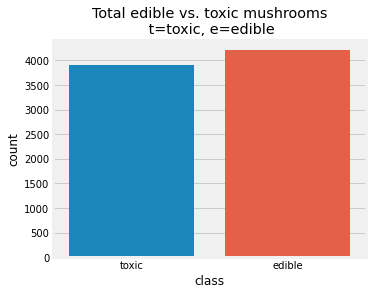

In [232]:
#visualize the count of edible vs poisonous mushroom
plt.figure(figsize=(5,4))
sns.countplot(new_data['class'])
plt.title("Total edible vs. toxic mushrooms\n t=toxic, e=edible")
plt.show()

In [233]:
#check distribution of the target variable 'e' & 't'
new_data['class'].value_counts()

edible    4208
toxic     3916
Name: class, dtype: int64

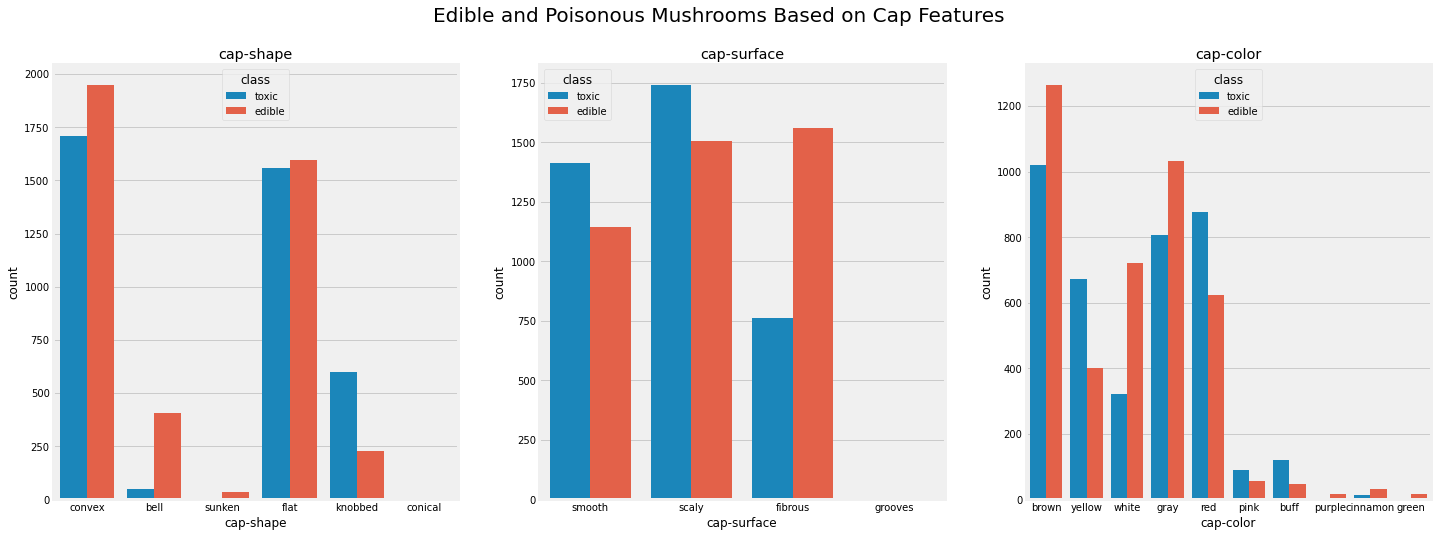

In [234]:
#visualize of edible vs. poisonous mushroom base of cap features 

fig,ax=plt.subplots(1,3,figsize=(22,8))
sns.countplot('cap-shape', hue='class', data=new_data, ax=ax[0])
ax[0].set_title('cap-shape')

sns.countplot('cap-surface', hue='class', data=new_data, ax=ax[1])
ax[1].set_title('cap-surface')

sns.countplot('cap-color',hue='class', data=new_data, ax=ax[2])
ax[2].set_title('cap-color')

fig.suptitle("Edible and Toxic Based on Cap Features", fontsize=20)
plt.show()

Text(0.5, 0.98, 'Edible and Poisonous Mushrooms Based on Gill Features')

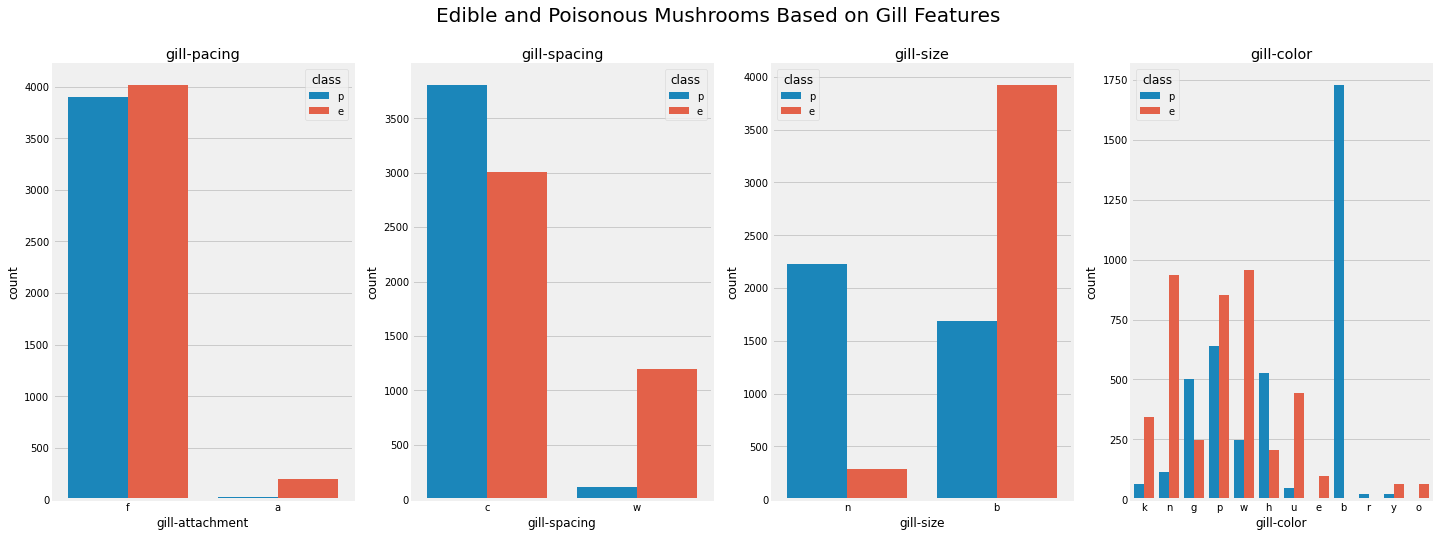

In [235]:
fig,ax=plt.subplots(1,4,figsize=(22,8))
sns.countplot('gill-attachment', hue='class', data=new_data, ax=ax[0])
ax[0].set_title('gill-pacing')
sns.countplot('gill-spacing', hue='class', data=new_data, ax=ax[1])
ax[1].set_title('gill-spacing')
sns.countplot('gill-size',hue='class', data=new_data, ax=ax[2])
ax[2].set_title('gill-size')
sns.countplot('gill-color',hue='class', data=new_data, ax=ax[3])
ax[3].set_title('gill-color')
fig.suptitle("Edible and Toxic Mushrooms Based on Gill Features", fontsize=20)


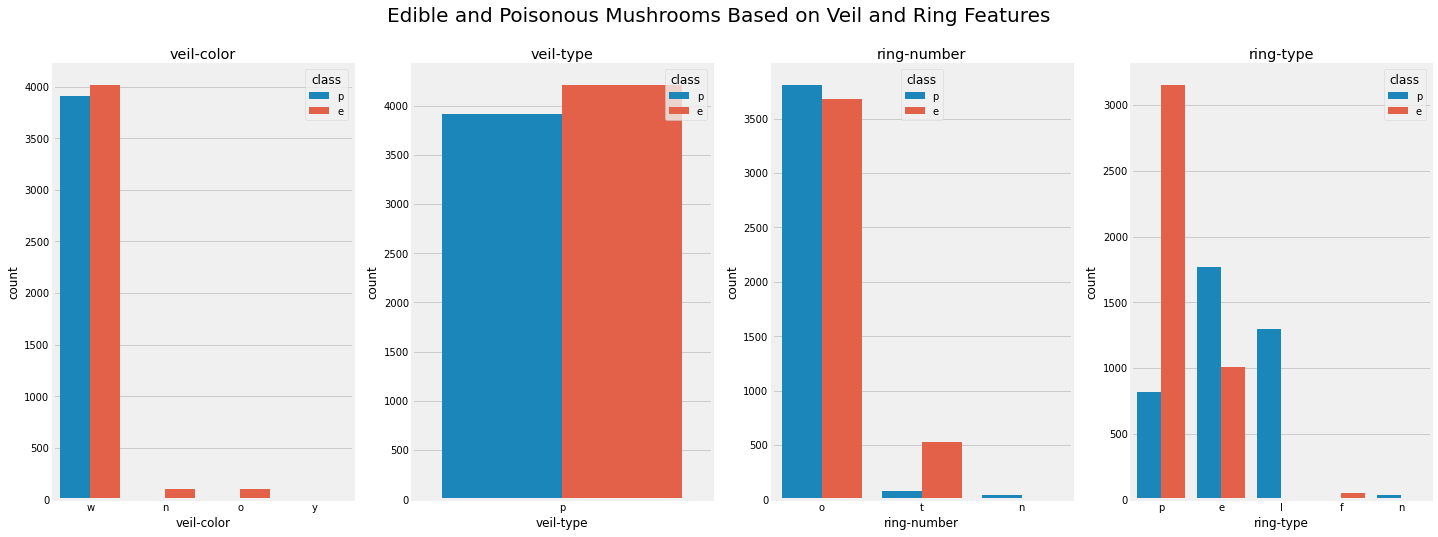

In [236]:
fig,ax=plt.subplots(1,4,figsize=(22,8))
sns.countplot('veil-color', hue='class', data=new_data, ax=ax[0])
ax[0].set_title('veil-color')

sns.countplot('veil-type', hue='class', data=new_data, ax=ax[1])
ax[1].set_title('veil-type')

sns.countplot('ring-number',hue='class', data=new_data, ax=ax[2])
ax[2].set_title('ring-number')

sns.countplot('ring-type',hue='class', data=new_data, ax=ax[3])
ax[3].set_title('ring-type')


fig.suptitle("Edible and Toxic Mushrooms Based on Veil and Ring Features", fontsize=20)

plt.show()

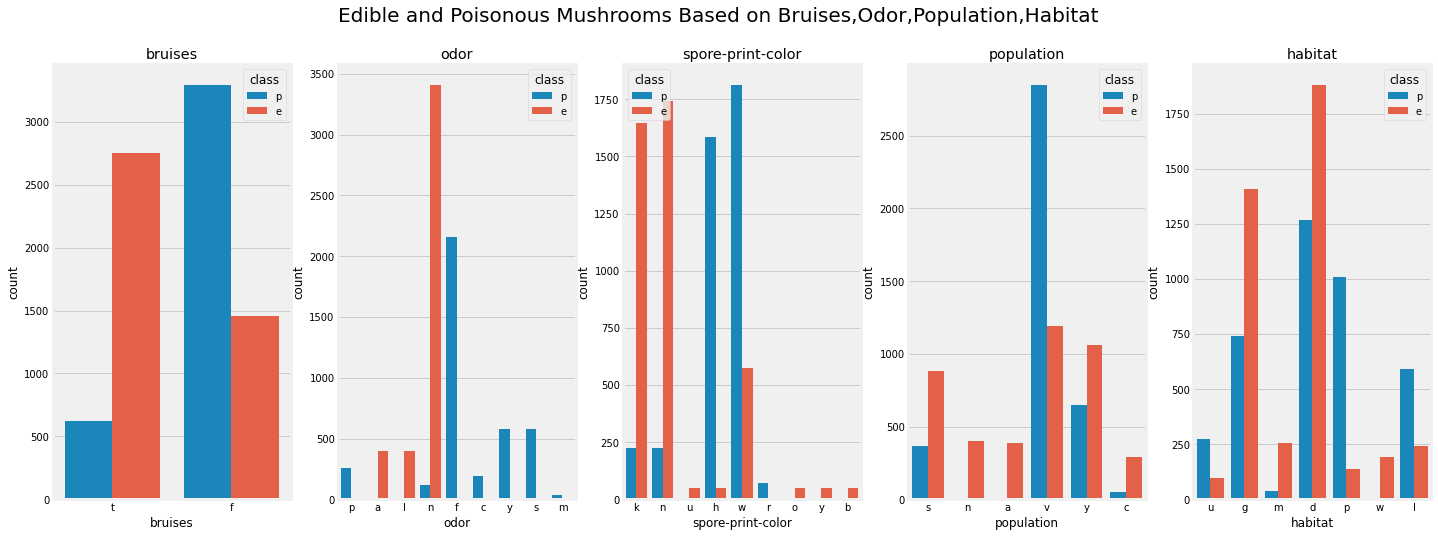

In [237]:
fig,ax=plt.subplots(1,5,figsize=(22,8))
sns.countplot('bruises', hue='class', data=new_data, ax=ax[0])
ax[0].set_title('bruises')

sns.countplot('odor', hue='class', data=new_data, ax=ax[1])
ax[1].set_title('odor')

sns.countplot('spore-print-color',hue='class', data=new_data, ax=ax[2])
ax[2].set_title('spore-print-color')

sns.countplot('population',hue='class', data=new_data, ax=ax[3])
ax[3].set_title('population'), 

sns.countplot('habitat',hue='class', data=new_data, ax=ax[4])
ax[4].set_title('habitat')

fig.suptitle("Edible and Toxic Mushrooms Based on Bruises,Odor,Population,Habitat", fontsize=20)

plt.show()

In [267]:
spore = pd.crosstab(index=new_data['class'], columns=new_data['spore-print-color'])
all_spore = pd.DataFrame(spore)
all_spore

spore-print-color,b,h,k,n,o,r,u,w,y
class,,,,,,,,,
e,48,48,1648,1744,48,0,48,576,48
p,0,1584,224,224,0,72,0,1812,0


In [239]:
#edibility of mushroom by habitat
habit = pd.crosstab(index=dataset['class'], columns=dataset['habitat'])
all_habitat = pd.DataFrame(habit)
all_habitat

habitat,d,g,l,m,p,u,w
class,,,,,,,
e,1880,1408,240,256,136,96,192
p,1268,740,592,36,1008,272,0


<function matplotlib.pyplot.show(close=None, block=None)>

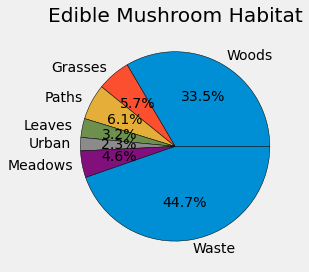

In [240]:
#percentage of edible mushroom in habitat.

plt.style.use('fivethirtyeight')
slices = [1408,240,256,136,96,192,1880] #edible
labels = ['Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste',]
colors =['orange','blue']
plt.pie(slices, labels=labels,autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.title('Edible Mushroom Habitat')
plt.tight_layout()
plt.show

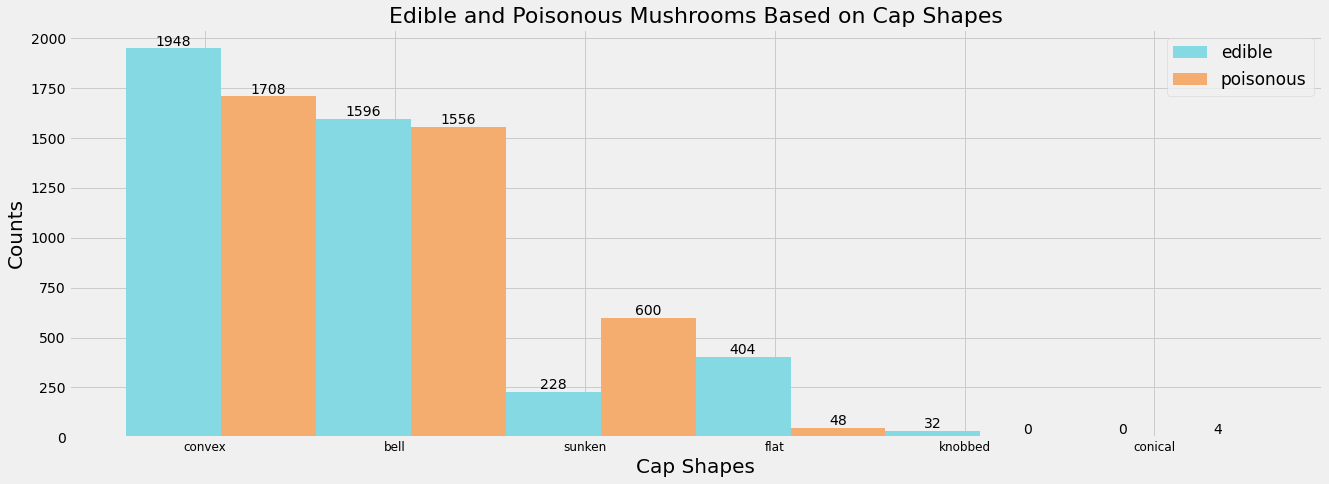

[1948, 1596, 228, 404, 32, 0]
[1708, 1556, 600, 48, 0, 4]


In [241]:
cap_shape = new_data['cap-shape'].value_counts()
m_height = cap_shape.values.tolist() #Provides numerical values
cap_shape.axes #Provides row labels
cap_shape_labels = cap_shape.axes[0].tolist() #Converts index object to list


poisonous_cc = [] #Poisonous color cap list
edible_cc = []    #Edible color cap list
for capShape in cap_shape_labels:
    size = len(new_data[dat['cap-shape'] == capShape].index)
    edibles = len(dataset[(dataset['cap-shape'] == capShape) & (dataset['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
    ind = np.arange(6)  # the x locations for the groups
        # the width of the bars                       
width = 0.50
fig, ax = plt.subplots(figsize=(20,7))
edible_bars = ax.bar(ind, edible_cc , width, color='#84D9E2')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='#F5AD6F')

#Add text for labels, title and axes ticks
ax.set_xlabel("Cap Shapes",fontsize=20)
ax.set_ylabel('Counts',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Shapes',fontsize=22)
ax.set_xticks(ind + width / 3) 
ax.set_xticklabels(('convex', 'bell','sunken', 'flat','knobbed', 'conical'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','toxic'),fontsize=17)
#Auto-labels the number of mushrooms for each bar color.


def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(poison_bars) 
autolabel(edible_bars)
plt.show() #Display bars. 
plt.show()
print(edible_cc)
print(poisonous_cc)

In [242]:
new_data= dataset.drop(columns=['veil-type'])
new_data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,s,k,w,w,w,o,e,w,v,l


<AxesSubplot:>

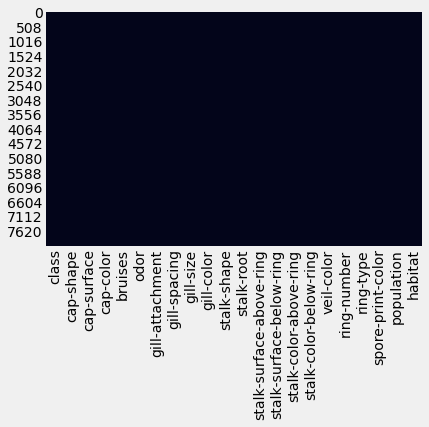

In [243]:
#checking for null values with heatmap
sns.heatmap(new_data.isnull(), cbar=False)

In [244]:
# need to convert categorical features into numerical values.
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#encode all columns
encode_data= new_data.apply(LabelEncoder().fit_transform)  
encode_data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


## Creating Models
### Logistic Regression and Decision Tree

In [245]:
#split the data into independent 'X' and dependent 'Y' variables
x = encode_data.iloc[:, 1:20].values
y = encode_data.iloc[:, 0].values   #target 

In [246]:
train_set.shape, target.shape

((8124, 21), (8124,))

In [248]:
#split the dataset into 80% training and 20% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [264]:

#scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Logistic Regression

In [250]:
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()


#fitting model with prediction data and telling it my target
model_log.fit(x_train, y_train)

LogisticRegression()

In [251]:
predictions = model_log.predict(x_test)
predictions

array([1, 0, 1, ..., 1, 1, 1])

In [252]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       836
           1       0.97      0.93      0.94       789

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

[[810  26]
 [ 59 730]]


In [253]:
#Precision – tell what percent of your predictions were correct
#Recall – tell percent of the positive cases you get
#F1 score – tell what percent of positive predictions were correct 

In [254]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
model_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [255]:
#accuracy report
predictions = model_tree.predict(x_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       836
           1       1.00      1.00      1.00       789

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

[[836   0]
 [  0 789]]


In [256]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits = 10 , shuffle=True, random_state =0)

In [257]:
scores = cross_val_score(log, x_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.94769231 0.95538462 0.96307692 0.95076923 0.94307692 0.94615385
 0.95230769 0.94615385 0.95846154 0.95531587]


In [258]:
#getting the range of  scores for log
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.943076923076923, 0.9518392793647031, 0.963076923076923)

In [259]:
scores = cross_val_score(tree, x_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [260]:
#getting the range of scores for tree
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(1.0, 1.0, 1.0)

## My mushroom prediction 

### volvariella (straw mushroom)
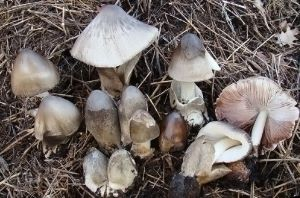
   


In [261]:
my_guess = [[2,3,0,0,7,1,0,1,0,3,7,7,0,2,1,4,0,3,4 ]]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_guess_scale = sc.fit_transform(my_guess)

pred = model_log.predict(my_guess_scale)
pred 
if pred == 0:
    print("Yumm, I can eat this!")
else:
    print('Oh no, this is not edible!')             #5,2,4,1,6,1,0,1,4,2,2,7,7,2,1,4,2,3,5 e
                                       # 2,3,0,0,1,6,0,0,1,3,7,7,0,0,2,3,0,3,4 my guess
                                       #2,3,0,0,7,1,0,1,0,3,7,7,0,2,1,4,0,3,4 t

Yumm, I can eat this!


###  Amanita virosa
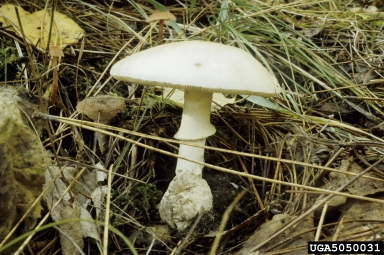

In [266]:
my_guess = [[0,5,2,9,1,0,1,0,0,4,2,2,7,7,2,1,4,2,2,]]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_guess_scale = sc.fit_transform(my_guess)

pred = model_log.predict(my_guess_scale)
print(pred) 
if pred == 1:
    print("Yumm, I can eat this!")
else:
    print('Oh no, this is not edible!')

[0]
Oh no, this is not edible!


My take away from this project is there are no single traits or features that can be used to identify whether a mushroom is toxic or edible. It is a combination of multiple features combined to determine mushroom edibilities. 

Because it is very difficult to identify a mushroom I would like to use Neural Network image processing.

I learn how to insert image to Jupyter Notebook it's quite awesome. 